In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [3]:
local_zip = 'C:/Users/OYO/Desktop/Tensorflow/traincvsd.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('tmp')
zip_ref.close()

In [37]:
os.mkdir('tmp/cats-v-dogs')
os.mkdir('tmp/cats-v-dogs/cats')
os.mkdir('tmp/cats-v-dogs/dogs')
os.mkdir('tmp/cats-v-dogs/training')
os.mkdir('tmp/cats-v-dogs/testing')
os.mkdir('tmp/cats-v-dogs/training/cats')
os.mkdir('tmp/cats-v-dogs/training/dogs')
os.mkdir('tmp/cats-v-dogs/testing/cats')
os.mkdir('tmp/cats-v-dogs/testing/dogs')


In [38]:
for filename in os.listdir('tmp/train'):
    if filename.startswith('cat'):
        file = 'tmp/train/' + filename
        destination = 'tmp/cats-v-dogs/cats/' + filename
        if os.path.getsize(file) > 0:
            copyfile(file, destination)
        else:
            print(filename + " is zero length, so ignoring.")
    elif filename.startswith('dog'):
        file = 'tmp/train/' + filename
        destination = 'tmp/cats-v-dogs/dogs/' + filename
        if os.path.getsize(file) > 0:
            copyfile(file, destination)
        else:
            print(filename + " is zero length, so ignoring.")
    else:
        pass

In [46]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):

        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")


    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

In [47]:
CAT_SOURCE_DIR = "tmp/cats-v-dogs/cats/"
TRAINING_CATS_DIR = "tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "tmp/cats-v-dogs/dogs/"
TRAINING_DOGS_DIR = "tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [49]:
print(len(os.listdir('tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('tmp/cats-v-dogs/testing/dogs/')))
print(len(os.listdir('tmp/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [55]:
TRAINING_DIR = "tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   batch_size=100,
                                                   class_mode='binary',
                                                   target_size=(150, 150))

VALIDATION_DIR = "tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [56]:
history = model.fit_generator(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/50
225/225 [==============================] - 318s 1s/step - loss: 0.6847 - acc: 0.6439 - val_loss: 0.5405 - val_acc: 0.7244
Epoch 2/50
225/225 [==============================] - 324s 1s/step - loss: 0.5104 - acc: 0.7486 - val_loss: 0.5002 - val_acc: 0.7540
Epoch 3/50
225/225 [==============================] - 328s 1s/step - loss: 0.4440 - acc: 0.7930 - val_loss: 0.4331 - val_acc: 0.7976
Epoch 4/50
225/225 [==============================] - 335s 1s/step - loss: 0.3885 - acc: 0.8232 - val_loss: 0.4088 - val_acc: 0.8164
Epoch 5/50
225/225 [==============================] - 349s 2s/step - loss: 0.3296 - acc: 0.8580 - val_loss: 0.4049 - val_acc: 0.8252
Epoch 6/50
225/225 [==============================] - 325s 1s/step - loss: 0.2654 - acc: 0.8871 - val_loss: 0.4371 - val_acc: 0.8128
Epoch 7/50
225/225 [==============================] - 336s 1s/step - loss: 0.1967 - acc: 0.9208 - val_loss: 0.4539 - val_acc: 0.8316
Epoch 8/50
225/225 [==============================] - 332s 1s/step - 

<Figure size 432x288 with 0 Axes>

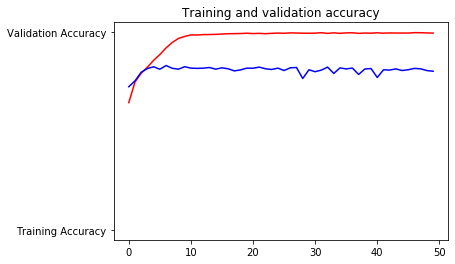

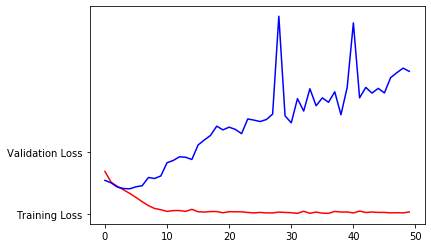

<Figure size 432x288 with 0 Axes>

In [57]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()